### A complete data exploration task
The following cells demonstrate a possible use of Pandas to perform data exploration and visualization using its internals.  
For this purpose, we'll be using a dataset about diamonds characteristics to show the basic steps of data exploration:

In [1]:
import pandas as pd
import numpy as np

filename = 'diamonds.csv'
dmds = pd.read_csv(filename)
data = dmds.copy()

data.tail()

carat        cut color clarity  depth  table  price     x     y     z
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

The <code>info</code> command displays the column names with their relevant data types and memory occupation for the loaded dataset.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


The <code>describe</code> method displays statistical information about the dataset for all numerical columns. As shown in the table below the categorical variables are disregarded by the function:

In [4]:
data.describe()

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  
max       58.900000     31.800000

Specific percentile values can be displayed by adding the list of desired percentiles in the <code>percentiles</code> parameter of the describe method:

In [5]:
percs = [.1, .3, .7, .9]
data.describe(percentiles=percs)

carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
10%        0.310000     60.000000     55.000000    646.000000      4.360000   
30%        0.420000     61.200000     56.000000   1087.000000      4.820000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
70%        1.010000     62.400000     58.000000   4662.000000      6.420000   
90%        1.510000     63.300000     60.000000   9821.000000      7.310000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
10%        4.360000      2.690000  
30%        4.830000      2.980000  
50%        5.710000      3.530000  
70%        6.420000      3.980000  
90%        7.300000      4.520000  
max       58.900000     31.800000

In order to display additional information about categorical variables an additional parameter should be specified to obtain record count, the number of unique values of each variable, the most frequent value and its occurrence count.

In [8]:
data.describe(include=object)

cut  color clarity
count   53940  53940   53940
unique      5      7       8
top     Ideal      G     SI1
freq    21551  11292   13065

In order to display the unique values for categorical features, the following command can be used:

In [12]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [13]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [14]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

One important transformation that might be useful for data manipulation is mapping all categorical variables into numerical equivalents. To do this, we first create the proper dictionaries:

In [15]:
cut_map = {v: c for c, v in enumerate(data['cut'].unique())}
color_map = {v: c for c, v in enumerate(data['color'].unique())}
clarity_map = {v: c for c, v in enumerate(data['clarity'].unique())}

In [16]:
cut_map, color_map, clarity_map

({'Ideal': 0, 'Premium': 1, 'Good': 2, 'Very Good': 3, 'Fair': 4},
 {'E': 0, 'I': 1, 'J': 2, 'H': 3, 'F': 4, 'G': 5, 'D': 6},
 {'SI2': 0,
  'SI1': 1,
  'VS1': 2,
  'VS2': 3,
  'VVS2': 4,
  'VVS1': 5,
  'I1': 6,
  'IF': 7})

Then we map the dataframe columns using the dictionaries to replace the textual values with the numerical ones:

In [17]:
data['cut'] = data['cut'].map(cut_map)
data['color'] = data['color'].map(color_map)
data['clarity'] = data['clarity'].map(clarity_map)
data.tail()

carat  cut  color  clarity  depth  table  price     x     y     z
53935   0.72    0      6        1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72    2      6        1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70    3      6        1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    1      3        0   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75    0      6        0   62.2   55.0   2757  5.83  5.87  3.64

It is often necessary to clean the dataset from NaN values before applying any machine learning algorithm, therefore we first need to check and eventually count these values across the columns:

In [18]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

A summary of the number of occurrencies of each symbol in a colum in descending order is easily obtained by:

In [19]:
count = dmds['cut'].value_counts()
count

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

<Axes: ylabel='cut'>

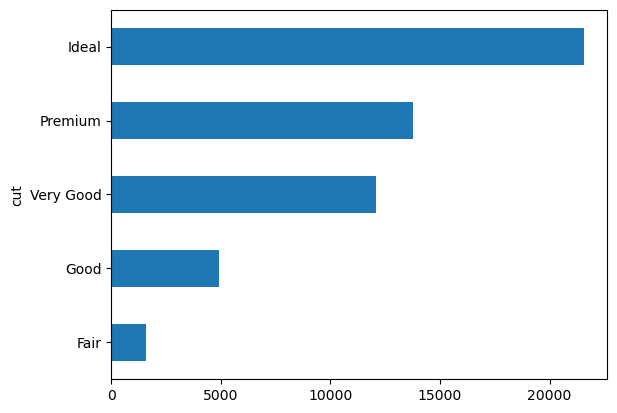

In [20]:
count.sort_values(ascending=True).plot(kind='barh')

A <code>group by</code> clause can be used to display more detailed information about a given column, preserving the natural ordering of the aggregation column, such as:

<Axes: xlabel='cut'>

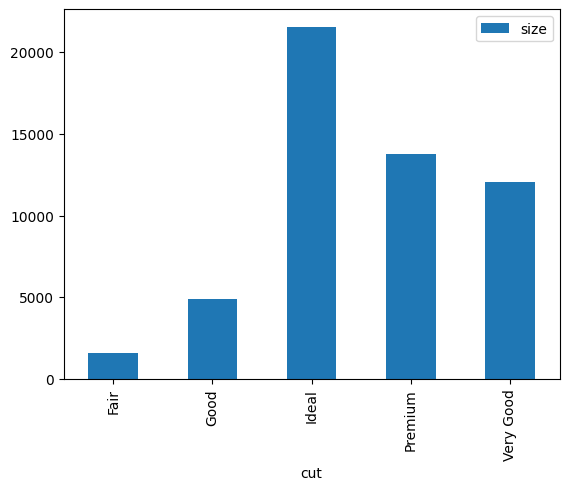

In [16]:
count = dmds.groupby(by='cut',as_index=False).size()
count.plot(kind='bar',x='cut',y='size')

Now we can filter out all diamonds that do not match our quality requirements by combining multiple conditions on the various columns: we select clarity **IF**, color **D** and cut **Ideal**.

In [21]:
topq = dmds[(data['carat'] > 1.0) & (data['clarity'] == 7) & (data['color'] == 6) & (data['cut'] == 0)]
topq

carat    cut color clarity  depth  table  price     x     y     z
25622   1.04  Ideal     D      IF   61.8   57.0  14494  6.49  6.52  4.02
25718   1.04  Ideal     D      IF   61.8   57.0  14626  6.52  6.49  4.02
26198   1.02  Ideal     D      IF   63.0   57.0  15575  6.39  6.35  4.01
26311   1.06  Ideal     D      IF   61.2   57.0  15813  6.57  6.61  4.03
26965   1.07  Ideal     D      IF   60.9   54.0  17042  6.66  6.73  4.08
27226   1.03  Ideal     D      IF   62.0   56.0  17590  6.55  6.44  4.03

Hence the percentage of top quality diamonds can be calculated by means of:

In [22]:
print('The top quality diamonds percentage is {:.3f} at the average price of {:.2f}$.'.format(topq.size/dmds.size*100,topq['price'].mean()))

The top quality diamonds percentage is 0.011 at the average price of 15856.67$.


Now let's visualize the diamonds with a pivot table to create a hierarchical view by clarity, color and cut:

In [23]:
thepivot = dmds.pivot_table(values=['carat','price'],index=['clarity','color','cut'],aggfunc=np.sum)
thepivot

C:\Users\kgab\AppData\Local\Temp\ipykernel_21724\302190639.py:1: FutureWarning: The provided callable <function sum at 0x0000015FBFE2DB20> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  thepivot = dmds.pivot_table(values=['carat','price'],index=['clarity','color','cut'],aggfunc=np.sum)


carat   price
clarity color cut                     
I1      D     Fair        7.51   29532
              Good        8.32   27926
              Ideal      12.48   45850
              Premium    13.86   45825
              Very Good   4.75   13114
...                        ...     ...
VVS2    J     Fair        1.01    2998
              Good       12.18   56825
              Ideal      47.01  222584
              Premium    42.57  218394
              Very Good  31.96  172853

[276 rows x 2 columns]

The pivot table is organized as a multi-index dataframe, whose data can be accessed through the <code>.loc</code> as shown in the cell below that reports the total carats and price of all top quality diamonds:

In [20]:
thepivot.loc['IF','D','Ideal']

carat        17.24
price    183881.00
Name: (IF, D, Ideal), dtype: float64

As already shown in the present example, pandas provides its own data plotting features, but it is still possible to extend the plots variety by means of additional packages, such as **seaborn** that will be discussed in further detail in lecture #5.

The following figure displays violin plots for some important features of our dataset.

<Axes: >

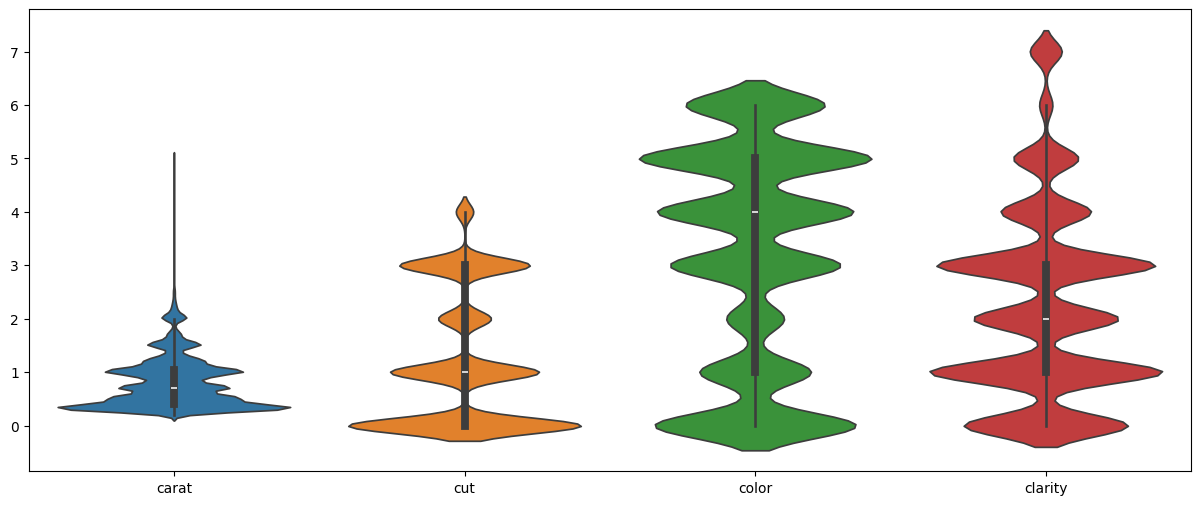

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,6))
sns.violinplot(data=data.loc[:,['carat','cut','color','clarity']], ax=ax)

Finally, it is possible to calculate the correlation matrix, a symmetric matrix that shows the correlation among pairs of data features: values close to 1.0 highlight strong positive correlation between the selected features meaning that both features move in the same direction, whereas negative values imply variations in opposite directions.

In [22]:
data.loc[:,['carat','cut','color','clarity']].corr()

carat       cut     color   clarity
carat    1.000000  0.114426 -0.065386 -0.281218
cut      0.114426  1.000000 -0.029128 -0.118670
color   -0.065386 -0.029128  1.000000  0.032589
clarity -0.281218 -0.118670  0.032589  1.000000

### Assignment
Following the example provided above, perform a complete data exploration task on the supplied <code>covid19_cases.csv</code>, trying to extract and plot significant information about the geographical incidence of the virus and focusing on an area of your particular interest.

### Add below your solution

In [1]:
import pandas as pd
import numpy as np

filename = 'covid19_cases.csv'
cvd = pd.read_csv(filename)
data = cvd.copy()
data.tail()

dateRep  day  month  year  cases  deaths countriesAndTerritories  \
58685  25/03/2020   25      3  2020      0       0                Zimbabwe   
58686  24/03/2020   24      3  2020      0       1                Zimbabwe   
58687  23/03/2020   23      3  2020      0       0                Zimbabwe   
58688  22/03/2020   22      3  2020      1       0                Zimbabwe   
58689  21/03/2020   21      3  2020      1       0                Zimbabwe   

      geoId countryterritoryCode  popData2019 continentExp  \
58685    ZW                  ZWE   14645473.0       Africa   
58686    ZW                  ZWE   14645473.0       Africa   
58687    ZW                  ZWE   14645473.0       Africa   
58688    ZW                  ZWE   14645473.0       Africa   
58689    ZW                  ZWE   14645473.0       Africa   

       Cumulative_number_for_14_days_of_COVID-19_cases_per_100000  
58685                                                NaN           
58686                                                NaN           
58687                                                NaN           
58688                                                NaN           
58689                                                NaN

### I want to explore the data for the Scandinavian countries: Norway, Sweden, and Denmark, and compare the historical data of cases, deaths and cumulative number for 14 days of COVID-19 cases per 100000 inhabitants (CN) in these countries.

In [2]:
# I'll start by extracting scandinavian data:
scandiData = data[data['geoId'].isin(['SE','DK','NO'])]
scandiData['geoId'].unique()

array(['DK', 'NO', 'SE'], dtype=object)

In [3]:
# Then I'll rename the last column to make it easier to work with:
scandiData.rename(columns={'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000':'CN'},inplace=True)
scandiData

C:\Users\danil\AppData\Local\Temp\ipykernel_17364\3301784274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scandiData.rename(columns={'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000':'CN'},inplace=True)


dateRep  day  month  year  cases  deaths countriesAndTerritories  \
14770  29/11/2020   29     11  2020   1636       7                 Denmark   
14771  28/11/2020   28     11  2020   1323       5                 Denmark   
14772  27/11/2020   27     11  2020   1191       9                 Denmark   
14773  26/11/2020   26     11  2020   1183       5                 Denmark   
14774  25/11/2020   25     11  2020   1367       8                 Denmark   
...           ...  ...    ...   ...    ...     ...                     ...   
51514  04/01/2020    4      1  2020      0       0                  Sweden   
51515  03/01/2020    3      1  2020      0       0                  Sweden   
51516  02/01/2020    2      1  2020      0       0                  Sweden   
51517  01/01/2020    1      1  2020      0       0                  Sweden   
51518  31/12/2019   31     12  2019      0       0                  Sweden   

      geoId countryterritoryCode  popData2019 continentExp          CN  
14770    DK                  DNK    5806081.0       Europe  297.550103  
14771    DK                  DNK    5806081.0       Europe  287.939490  
14772    DK                  DNK    5806081.0       Europe  283.013620  
14773    DK                  DNK    5806081.0       Europe  279.913422  
14774    DK                  DNK    5806081.0       Europe  276.658214  
...     ...                  ...          ...          ...         ...  
51514    SE                  SWE   10230185.0       Europe         NaN  
51515    SE                  SWE   10230185.0       Europe         NaN  
51516    SE                  SWE   10230185.0       Europe         NaN  
51517    SE                  SWE   10230185.0       Europe         NaN  
51518    SE                  SWE   10230185.0       Europe         NaN  

[1005 rows x 12 columns]

In [4]:
# Then I will filter the data to show only the columns of interest:
scandiData = scandiData.loc[:,['month', 'geoId', 'cases', 'deaths', 'CN']]
scandiData

month geoId  cases  deaths          CN
14770     11    DK   1636       7  297.550103
14771     11    DK   1323       5  287.939490
14772     11    DK   1191       9  283.013620
14773     11    DK   1183       5  279.913422
14774     11    DK   1367       8  276.658214
...      ...   ...    ...     ...         ...
51514      1    SE      0       0         NaN
51515      1    SE      0       0         NaN
51516      1    SE      0       0         NaN
51517      1    SE      0       0         NaN
51518     12    SE      0       0         NaN

[1005 rows x 5 columns]

In [5]:
# Further, I will filter out rows with NaN-values:
scandiData = scandiData.dropna()
scandiData


month geoId  cases  deaths          CN
14770     11    DK   1636       7  297.550103
14771     11    DK   1323       5  287.939490
14772     11    DK   1191       9  283.013620
14773     11    DK   1183       5  279.913422
14774     11    DK   1367       8  276.658214
...      ...   ...    ...     ...         ...
51501      1    SE      0       0    0.000000
51502      1    SE      0       0    0.000000
51503      1    SE      0       0    0.000000
51504      1    SE      0       0    0.000000
51505      1    SE      0       0    0.000000

[966 rows x 5 columns]

In [6]:
# To create the histograms, I will need to group the data by month and geoId:
scandiData = scandiData.groupby(by=['month', 'geoId'], as_index=False).sum()
scandiData

month geoId   cases  deaths            CN
0       1    DK       0       0      0.000000
1       1    NO       0       0      0.000000
2       1    SE       0       0      0.000000
3       2    DK       2       0      0.068893
4       2    NO       6       0      0.206448
5       2    SE      11       0      0.166175
6       3    DK    2575      77    398.427097
7       3    NO    4220      26    691.320090
8       3    SE    4349     334    314.627741
9       4    DK    6431     366   1522.937761
10      4    NO    3441     176   1217.049922
11      4    SE   16608    2544   1914.794307
12      5    DK    2625     128    802.434551
13      5    NO     744      34    277.672885
14      5    SE   17423    1751   2406.759995
15      6    DK    1118      34    293.244273
16      6    NO     444      13    112.026323
17      6    SE   28669     854   3554.618025
18      7    DK     974      10    214.327013
19      7    NO     317       6     86.239061
20      7    SE    9622     247   2087.332732
21      8    DK    2975       9    697.423959
22      8    NO    1371       9    322.472154
23      8    SE    7552      70   1067.087252
24      9    DK   10764      26   1873.329015
25      9    NO    3245      10    724.821009
26      9    SE    8914      53    976.385080
27     10    DK   17761      69   3700.034498
28     10    NO    5775       8   1153.276183
29     10    SE   35894     150   3057.100140
30     11    DK   33129     104   7389.700557
31     11    NO   15184      46   3753.904687
32     11    SE  114087     678  14189.762942

<Axes: xlabel='month'>

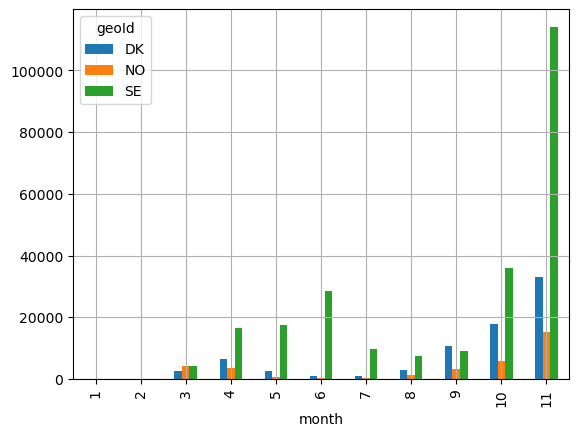

In [167]:
# We can then plot the histogram of the number of cases in each country in 2020:
scandiData.pivot(index='month', columns='geoId', values='cases').plot(kind='bar', stacked=False, grid=True)


<Axes: xlabel='month'>

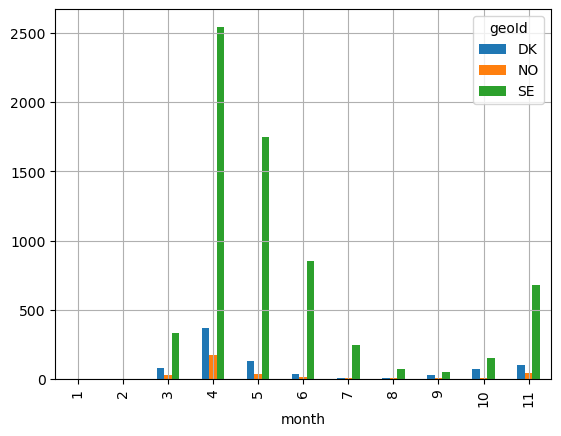

In [168]:
# And a monthly histogram of the number of deaths:
scandiData.pivot(index='month', columns='geoId', values='deaths').plot(kind='bar', stacked=False, grid=True)

<Axes: xlabel='month'>

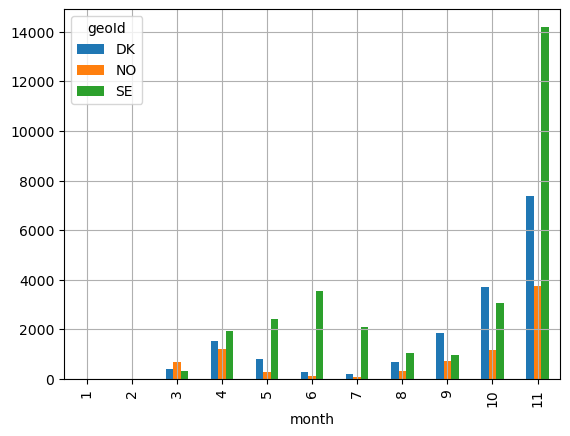

In [169]:
# And lastly, a monthly histogram of CN:
scandiData.pivot(index='month', columns='geoId', values='CN').plot(kind='bar', stacked=False, grid=True)

In [172]:
# Finally, to sum up the comparison between the trends of COVID-19 in the scandinavian countries in 2020,
# we can create correlation matrices to numerically compare the development of cases, deaths and CN in the countries:

# Cases:
scandiData.pivot(index='month', columns='geoId', values='cases').corr()



geoId        DK        NO        SE
geoId                              
DK     1.000000  0.957709  0.908547
NO     0.957709  1.000000  0.910816
SE     0.908547  0.910816  1.000000

In [173]:
# Deaths:
scandiData.pivot(index='month', columns='geoId', values='deaths').corr()

geoId        DK        NO        SE
geoId                              
DK     1.000000  0.977639  0.905575
NO     0.977639  1.000000  0.865280
SE     0.905575  0.865280  1.000000

In [174]:
# CN:
scandiData.pivot(index='month', columns='geoId', values='CN').corr()


geoId        DK        NO        SE
geoId                              
DK     1.000000  0.958965  0.896102
NO     0.958965  1.000000  0.903654
SE     0.896102  0.903654  1.000000

#### To summarize, from the histograms its clear that Covid-19 had a bigger impact on Sweden historically than for the other scandinavian countries. Though Denmark is displaying higher numbers in all trends compared to Norway in the histograms, the correlation matrices showcase a near identical development of Covid-19 in the two countries. Sweden does also have a strong correlation to both Norway and Denmark, but comparatively weaker.